In [33]:
!pip install langgraph langsmith


In [34]:
!pip install langchain langchain_groq langchain_community

In [11]:
import os

In [15]:
from dotenv import load_dotenv

In [28]:
load_dotenv()
os.environ["GROQ_API_KEY"]="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"
langsmith=os.environ["LANGSMITH_API_KEY"]="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"

In [30]:
print(GROQ_API_KEY)
print(langsmith)

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
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


In [32]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"


In [35]:
from langchain_groq import ChatGroq

In [36]:
llm=ChatGroq(groq_api_key="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",model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000022A25D0BC50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000022A25D2A450>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

# Start Building Chatbot Using Langgraph

In [37]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [38]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [39]:
graph_builder

In [40]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [41]:
graph_builder.add_node("chatbot",chatbot)

In [42]:
graph_builder

In [43]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [44]:
graph=graph_builder.compile()

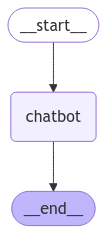

In [45]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [46]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋  What can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001896327, 'queue_time': 0.017724363, 'total_time': 0.029169054}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-9e02791e-b27f-4703-bc2a-5e27a38cb669-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hello! 👋  What can I do for you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001896327, 'queue_time': 0.017724363, 'total_time': 0.029169054}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-9e02791e-b2

User: q
Good Bye
